In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
p_data = "../Resources/project_data_final.csv"
p_df = pd.read_csv(p_data)
p_df['Date Application Received'] = pd.to_datetime(p_df['Date Application Received'])
#p_df = p_df.sort_values('Date Application Received', ascending=True)
p_df = p_df.drop(columns=['Unnamed: 0'])
p_df = p_df.dropna()

print(p_df['Purchase Type'].unique())
p_df.head(3)

['Purchase' 'Lease' 'Power Purchase Agreement']


/Users/dmanandhar/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Project Number,City,Zip Code,Sector,Electric Utility,Purchase Type,Project Status,Date Application Received,Date Completed,Project Cost,...,education_associates,education_bachelors,education_masters,education_professional,education_doctorate,Date Application Received Int,Date Completed Int,Project Days Int,Completed Year,Completed Month
0,4260-88892,Three Mile Bay,13693,Residential,National Grid,Purchase,Complete,2016-02-01,2016-09-21,29680.00,...,24.0,57.0,17.0,0.0,0.0,1454313600,1474441200,232,2016,9
1,89350,Queens,11434,Residential,Consolidated Edison,Lease,Complete,2017-05-30,2017-07-25,30791.25,...,3576.0,5680.0,2599.0,318.0,83.0,1496127600,1500966000,56,2017,7
2,93198,Bronx,10456,Residential,Consolidated Edison,Lease,Complete,2017-07-19,2017-09-20,13906.00,...,2522.0,3906.0,1054.0,242.0,50.0,1500447600,1505890800,63,2017,9


In [3]:
#create analysis data frames
df = p_df[['Project Number','Sector','Date Application Received','Purchase Type']]

purchase_df = df.loc[df['Purchase Type'] == 'Purchase']
purchase_df = purchase_df.reset_index()
purchase_df = purchase_df.drop(columns=['index'])
purchase_df = purchase_df.sort_values('Date Application Received', ascending=True)
purchase_df = purchase_df.reset_index()
purchase_df = purchase_df.drop(columns=['index'])

lease_df = df.loc[df['Purchase Type'] == 'Lease']
lease_df = lease_df.reset_index()
lease_df = lease_df.drop(columns=['index'])
lease_df = lease_df.sort_values('Date Application Received', ascending=True)
lease_df = lease_df.reset_index()
lease_df = lease_df.drop(columns=['index'])

ppa_df = df.loc[df['Purchase Type'] == 'Power Purchase Agreement']
ppa_df = ppa_df.reset_index()
ppa_df = ppa_df.drop(columns=['index'])
ppa_df = ppa_df.sort_values('Date Application Received', ascending=True)
ppa_df = ppa_df.reset_index()
ppa_df = ppa_df.drop(columns=['index'])

print(len(purchase_df))
print(len(lease_df))
print(len(ppa_df))

print(ppa_df.head(3))

31237
30995
10743
  Project Number           Sector Date Application Received  \
0     4548-21056  Non-Residential                2010-11-05   
1     4362-21106  Non-Residential                2010-11-15   
2     4548-22794  Non-Residential                2011-05-13   

              Purchase Type  
0  Power Purchase Agreement  
1  Power Purchase Agreement  
2  Power Purchase Agreement  


In [4]:
purchase_count_df = purchase_df.groupby('Date Application Received').agg({'Date Application Received':['count'],})
purchase_count_df = purchase_count_df['Date Application Received']
purchase_count_df = purchase_count_df.reset_index()

lease_count_df = lease_df.groupby('Date Application Received').agg({'Date Application Received':['count'],})
lease_count_df = lease_count_df['Date Application Received']
lease_count_df = lease_count_df.reset_index()

ppa_count_df = ppa_df.groupby('Date Application Received').agg({'Date Application Received':['count'],})
ppa_count_df = ppa_count_df['Date Application Received']
ppa_count_df = ppa_count_df.reset_index()

purchase_count_df.head(10)

,Date Application Received,count
0,2010-04-12,1
1,2010-04-13,1
2,2010-04-14,1
3,2010-04-28,1
4,2010-05-04,2
5,2010-05-05,1
6,2010-05-06,1
7,2010-05-07,4
8,2010-05-08,1
9,2010-05-10,7


Text(0.5,1,'Solar Power Installation')

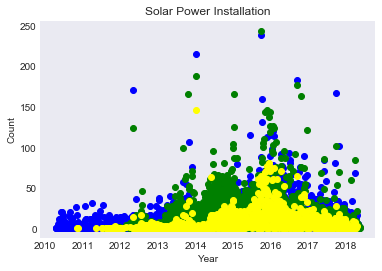

In [5]:
sns.set_style('dark')
plt.plot_date(purchase_count_df["Date Application Received"], purchase_count_df["count"], marker="o",c='blue')

plt.plot_date(lease_count_df["Date Application Received"], lease_count_df["count"], marker="o", c='green')

plt.plot_date(ppa_count_df["Date Application Received"], ppa_count_df["count"], marker="o", c='yellow')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title("Solar Power Installation")